In [56]:
import pandas as pd
from os.path import join
import glob

import matplotlib.pyplot as plt
%matplotlib inline

### Load the log file
Due to reprocessing, some entries are duplicated

In [29]:
df = pd.read_table("../../gutenberg/.log", names=["PGcode", "tokenizer", "lines_before", "lines_after", "tokens", "types"])
df.drop_duplicates(inplace=True)

In [30]:
df.head()

,PGcode,tokenizer,lines_before,lines_after,tokens,types
0,PG51647,finnish,7674,7289,41136,12657
1,PG45792,english,20520,20133,175389,9046
2,PG45992,english,5440,5051,41326,4922
3,PG46531,english,28179,27792,224357,11913
4,PG9575,english,3389,3027,17170,3628


In [31]:
print(len(df))

55658


At the moment I have 55K PG books in the `.log` file. Let us compare with the actual files:

In [32]:
gutenberg_dir = "../../gutenberg/"

In [37]:
for folder in ["raw", "text", "tokens", "counts"]:
    print(f"{folder}: %d files" % len(glob.glob(join(gutenberg_dir, "data", folder, f"PG*_{folder}.txt"))))

raw: 55755 files
text: 55658 files
tokens: 55658 files
counts: 55658 files


So there are 55755-55758 = 97 books lost at some point. When?

In [45]:
! cd ../../gutenberg; python process_data.py | head

# WARNING: cannot process 'data/raw/PG44402_raw.txt'
# WARNING: cannot process 'data/raw/PG51970_raw.txt'
# WARNING: cannot process 'data/raw/PG1344_raw.txt'
# WARNING: cannot process 'data/raw/PG38507_raw.txt'
# WARNING: cannot process 'data/raw/PG3926_raw.txt'
# WARNING: cannot process 'data/raw/PG24895_raw.txt'
# WARNING: cannot process 'data/raw/PG4936_raw.txt'
# WARNING: cannot process 'data/raw/PG29758_raw.txt'
# WARNING: cannot process 'data/raw/PG7684_raw.txt'
# WARNING: cannot process 'data/raw/PG55700_raw.txt'


In [48]:
! cd ../../gutenberg; python process_data.py | wc -l

97


So everything is good! We know it is an encoding problem. 97/55758 = 0.17 % is very very low! 

In [50]:
97/55758

0.0017396606764948528

In [52]:
cutlines = (df.lines_before-df.lines_after)

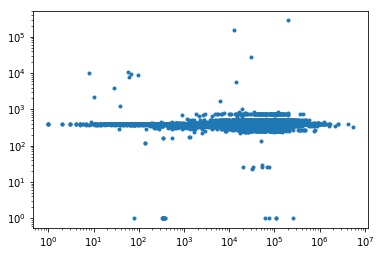

In [62]:
plt.loglog(df.tokens, cutlines, ".")